In [404]:
# import libraries
import os
import pandas as pd
from tqdm import tqdm
import numpy as np

import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
warnings.filterwarnings("ignore")



# Data Preperation

In [405]:
# Reading the data from csv file
DATA_AUDIO_DIR = 'servey_data/'
columns = pd.read_csv(DATA_AUDIO_DIR + 'columns.csv')
responses = pd.read_csv(DATA_AUDIO_DIR + 'responses.csv')
print("Questions Data Shape: " + str(columns.shape) )
print("Responses Data Shape: " + str(responses.shape) )

Questions Data Shape: (150, 2)
Responses Data Shape: (1010, 150)


In [406]:
responses.isna().sum()

Music                             3 
Slow songs or fast songs          2 
Dance                             4 
Folk                              5 
Country                           5 
Classical music                   7 
Musical                           2 
Pop                               3 
Rock                              6 
Metal or Hardrock                 3 
Punk                              8 
Hiphop, Rap                       4 
Reggae, Ska                       7 
Swing, Jazz                       6 
Rock n roll                       7 
Alternative                       7 
Latino                            8 
Techno, Trance                    7 
Opera                             1 
Movies                            6 
Horror                            2 
Thriller                          1 
Comedy                            3 
Romantic                          3 
Sci-fi                            2 
War                               2 
Fantasy/Fairy tales               3 
A

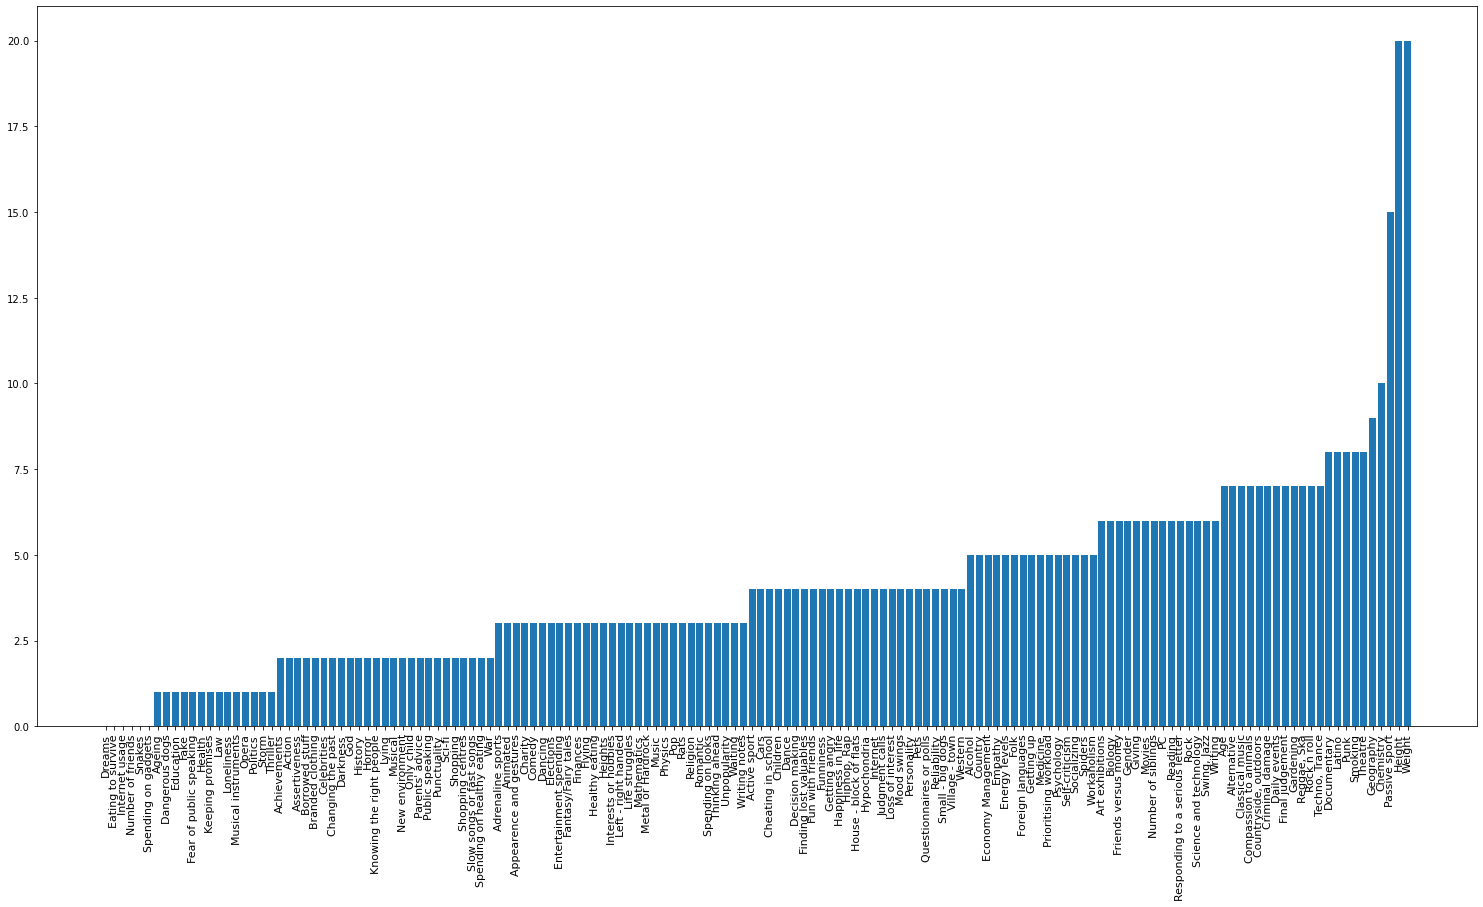

In [408]:
plotly.offline.init_notebook_mode()
# Find number of missing values in each feature 
indices = responses.isna().sum().index
values = responses.isna().sum().values
labels = indices
soted_sum = [x for _,x in sorted(zip(values,labels))]
fig = px.bar(x=soted_sum , y=sorted(values),labels={
                     "x": "Features",
                     "y": "missing values count"
                 })

fig.show()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(soted_sum, sorted(values))
plt.xticks(fontsize = 11, rotation='90')
plt.show()

In [409]:
# Drop missing na values to see how that will change the size of the data
responses_nona = responses.dropna(inplace = False)
print("Responses Data Shape with no records contains missing data: " + str(responses_nona.shape) )

Responses Data Shape with no records contains missing data: (674, 150)


In [410]:
# Save the data with missing data to generate at the end
responses_generate =responses[ responses.isnull().any(axis=1)]
print("Responses Data Shape with records contains missing data: " + str(responses_generate.shape) )

Responses Data Shape with records contains missing data: (336, 150)


In [411]:
# Find Categorical Columns
cols = []
for i in responses_nona.columns:
    typecol = responses[i].dtypes
    if typecol =="object":
        cols.append(i)
print("Categorical Features:")        
print(cols)

Categorical Features:
['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']


# Data Exploration

In [413]:
# Visulaizing the number of records with missing values vs eithout missing values
num_with_missing = responses.shape[0] - responses_nona.shape[0]
num_without_missing = responses_nona.shape[0]
print("Number of records without missing values: " + str(num_without_missing))
print("Number of records with missing values: " + str(num_with_missing))
labels = ["records with no missing values", "records with missing values"]
fig = px.bar(x=[num_without_missing, num_with_missing], y=labels, orientation='h',
             height=400)
plotly.offline.iplot(fig)
  

Number of records without missing values: 674
Number of records with missing values: 336


In [415]:
# percentage of participants per gender 
labels = responses['Gender'].value_counts().index
count = responses['Gender'].value_counts().values
print("Number of male parecepants: " + str(count[1]))
print("Number of demale parecepants: " + str(count[0]))
fig = go.Figure(data=[go.Pie(labels=labels, values=count)])
plotly.offline.iplot(fig)

Number of male parecepants: 411
Number of demale parecepants: 593


In [417]:
# Number of particpipants per age and gender Replace na with 0 to be able to see it
#prepare the ages frequency table by gender
#plot it
r = responses.copy()
r.Age = r.Age.fillna(0)
female_ages = r.loc[r['Gender'] == 'female', 'Age'].values
count_unique_ages = np.array(np.unique(female_ages, return_counts=True)).T
Ages_female = count_unique_ages[:,0]
count_female =count_unique_ages[:,1]
male_ages = r.loc[r['Gender'] == 'male', 'Age'].values
count_male = np.array(np.unique(male_ages, return_counts=True)).T
Ages_male = count_male[:,0]
count_male =count_male[:,1]
print("Ages of participants: ")
print(set(Ages_male))

trace1 = go.Bar(
   x = Ages_female,
   y = count_female,
   name = 'Female'
)
trace2 = go.Bar(
   x = Ages_male,
   y = count_male,
   name = 'Male'
)
data = [trace1, trace2]
layout = go.Layout(barmode = 'group',xaxis=dict(title="Ages"),yaxis=dict(title="Number of participants"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)

Ages of participants: 
{0.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0}


In [420]:
# Education category frequency table, count the number of participents hold an education degree
labels = responses['Education'].value_counts().index
count = responses['Education'].value_counts().values
print("Participants Education:")
print(responses['Education'].value_counts().index.values)
fig = px.bar(x=count, y=labels, orientation='h',height=400)
fig.update_traces(marker_color='navy')
plotly.offline.iplot(fig)

Participants Education:
['secondary school' 'college/bachelor degree' 'masters degree'
 'primary school' 'currently a primary school pupil' 'doctorate degree']


In [421]:
# Find Internet usage per day percentage
labels = responses['Internet usage'].value_counts().index
count = responses['Internet usage'].value_counts().values
print("If the image doesn't appear please refer to the html file")
fig = go.Figure(data=[go.Pie(labels=labels, values=count)])
fig.update_traces(marker=dict(colors=px.colors.sequential.RdBu))
plotly.offline.iplot(fig)

If the image doesn't appear please refer to the html file


If the image doesn't appear please refer to the html file


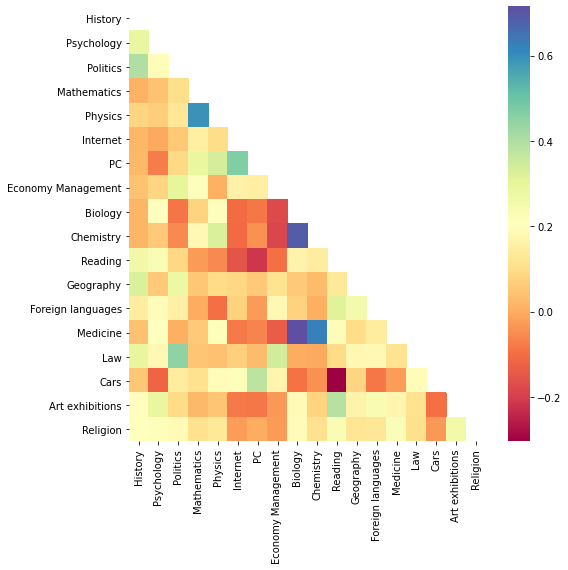

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns
# HOBBIES & INTERESTS correlation matrix visualization
print("If the image doesn't appear please refer to the html file")
l = responses[["History",
"Psychology","Politics","Mathematics","Physics","Internet","PC","Economy Management",
"Biology","Chemistry","Reading","Geography","Foreign languages","Medicine","Law","Cars","Art exhibitions",
"Religion"]]
corr_df = l.corr()
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
plt.figure(figsize = (8,8))
hmap= sns.heatmap(corr_df, mask=mask_ut, cmap="Spectral")

In [65]:
#50% of the time when Height was null Weight was null and 5% Age was Null
responses[responses["Height"].isna()][["Weight","Height","Age"]]


Weight  Height   Age
51   75.0   NaN      19.0
137 NaN     NaN     NaN  
142 NaN     NaN     NaN  
209 NaN     NaN      21.0
276 NaN     NaN      21.0
462  60.0   NaN     NaN  
495 NaN     NaN      20.0
499  76.0   NaN      22.0
551 NaN     NaN      16.0
552  50.0   NaN      19.0
558 NaN     NaN      19.0
560  57.0   NaN      16.0
657  61.0   NaN      24.0
659  65.0   NaN      20.0
790 NaN     NaN      20.0
885  165.0  NaN      23.0
902 NaN     NaN     NaN  
939  47.0   NaN      20.0
960 NaN     NaN     NaN  
964  75.0   NaN      21.0

# Categorical Features One-hot Encoding 

In [424]:
# One hot encoding for categorical features 
cat_cols = []
def encode_categorical_features(responses_nona):
    cols = []
    for i in responses_nona.columns:
        typecol = responses[i].dtypes
        if typecol =="object":
            cols.append(i)
    def one_hot_encoding(column_name, responses):
        enc = pd.get_dummies(responses[column_name])
        for i in enc.columns:
            cat_cols.append(column_name+"_"+i)    
        enc = enc.rename(lambda x: column_name+"_"+x, axis='columns')
        return enc
    responses_encoded = responses_nona.copy()
    for i in cols:
        if i in responses.columns:
            dnc = one_hot_encoding(i, responses) 
            responses_encoded = responses_encoded.drop(i,1)
            responses_encoded = responses_encoded.join(dnc)
    return responses_encoded 
responses_encoded = encode_categorical_features(responses_nona)
print("Encoded responses with no missing recird size: " + str(responses_encoded.shape))

Encoded responses with no missing recird size: (674, 173)


In [425]:
# Normalize the numerical columns to get value between 0-1 because the categorical data now is either 0,1 values
# kept it in the dataframe and replace the nan values with 0 for these columns
#"The original values" beacuse it became null of dividing by 0 "The maximum value"
# also added the denormalizeion to return the data values to it's original value 
class Normalize:
    def __init__(self, dataset):
        self.dataset = dataset
    def normalize(self):
        dataset = self.dataset
        dataset_normalized = (dataset - dataset.min())/(dataset.max() - dataset.min())
        dataset_normalized = dataset_normalized.fillna(0)
        self.dataset_normalized = dataset_normalized
        return self.dataset_normalized
    def de_normalize(self,normalized):
        dataset = self.dataset
        dataset_normalized = normalized
        dataset_de_normalized= (dataset_normalized *(dataset.max() - dataset.min()))+ dataset.min()
        self.dataset_de_normalized = dataset_de_normalized
        return self.dataset_de_normalized
n = Normalize(responses_encoded)
responses_normalized = n.normalize()
responses_normalized.head(1)

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0  1.0    0.5                       0.25   0.0   0.25     0.25              

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0  0.0      1.0  1.0   0.0                0.0   0.0          0.0           

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0  0.0          0.5          0.0          0.0     0.0             0.0     

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  War  \
0  1.0     0.75    0.25      1.0     0.75      0.75    0.0   

   Fantasy/Fairy tales  Animated  Documentary  Western  Action  History  \
0  1.0                  1.0       0.5          0.0      0.25    0.0       

   Psychology  Politics  Mathematics  Physics  Internet   PC  \
0  1.0         0.0       0.5          0.5      1.0       0.5   

   Economy Management  Biology  Chemistry  Reading  Geography  \
0  1.0                 0.5      0.5        0.5      0.5         

   Foreign languages  Medicine  Law  Cars  Art exhibitions  Religion  \
0  1.0                0.5       0.0  0.0   0.0              0.0        

   Countryside, outdoors  Dancing  Musical instruments  Writing  \
0  1.0                    0.5      0.5                  0.25      

   Passive sport  Active sport  Gardening  Celebrities  Shopping  \
0  0.0            1.0           1.0        0.0          0.75       

   Science and technology  Theatre  Fun with friends  Adrenaline sports  Pets  \
0  0.75                    0.25     1.0               0.75               0.75   

   Flying  Storm  Darkness  Heights  Spiders  Snakes  Rats  Ageing  \
0  0.0     0.0    0.0       0.0      0.0      1.0     0.5   0.0      

   Dangerous dogs  Fear of public speaking  Healthy eating  Daily events  \
0  0.5             0.25                     0.75            0.25           

   Prioritising workload  Writing notes  Workaholism  Thinking ahead  \
0  0.25                   1.0            0.75         0.25             

   Final judgement  Reliability  Keeping promises  Loss of interest  \
0  1.0              0.75         0.75              0.0                

   Friends versus money  Funniness  Fake  Criminal damage  Decision making  \
0  0.5                   1.0        0.0   0.0              0.5               

   Elections  Self-criticism  Judgment calls  Hypochondria  Empathy  \
0  0.75       0.0             0.5             0.0           0.5       

   Eating to survive  Giving  Compassion to animals  Borrowed stuff  \
0  0.0                0.75    1.0                    0.75             

   Loneliness  Cheating in school  Health  Changing the past  God  Dreams  \
0  0.5         0.25                0.0     0.0                0.0  0.75     

   Charity  Number of friends  Waiting  New environment  Mood swings  \
0  0.25     0.5                0.5      0.75             0.5           

   Appearence and gestures  Socializing  Achievements  \
0  0.75                     0.5          0.75           

   Responding to a serious letter  Children  Assertiveness  Getting angry  \
0  0.5                             1.0       0.0            0.0             

   Knowing the right people  Public speaking  Unpopularity  Life struggles  \
0  0.5                       1.0              1.0           0.0              

   Happiness in life  Energy levels  Small - big dogs  Personality  \
0  0.75               1.0            0.0               0.75          

   Finding lost valuables  Getting up  Interests or hobbies  Parents' advice  \
0  0.5                     0.25        0.5                   0.75              

   Questionnaires or polls  Finances  Shopping centres  Branded clothing  \
0  0.5                      0.5       0.75              1.0                

   Entertainment spending  Spending on looks  Spending on gadgets  \
0  0.5                     0.5                0.0                   

   Spending on healthy eating       Age    Height   Weight  \
0  0.5              

In [426]:
responses_normalized.shape

(674, 173)

In [427]:
# Find the numerical features labels
num_cols = []
for i in responses_normalized.columns:
    if i not in cat_cols:
        num_cols.append(i)
num_cols        

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [429]:
# Categorical Columns after encoding:
cat_cols

['Smoking_current smoker',
 'Smoking_former smoker',
 'Smoking_never smoked',
 'Smoking_tried smoking',
 'Alcohol_drink a lot',
 'Alcohol_never',
 'Alcohol_social drinker',
 'Punctuality_i am always on time',
 'Punctuality_i am often early',
 'Punctuality_i am often running late',
 'Lying_everytime it suits me',
 'Lying_never',
 'Lying_only to avoid hurting someone',
 'Lying_sometimes',
 'Internet usage_few hours a day',
 'Internet usage_less than an hour a day',
 'Internet usage_most of the day',
 'Internet usage_no time at all',
 'Gender_female',
 'Gender_male',
 'Left - right handed_left handed',
 'Left - right handed_right handed',
 'Education_college/bachelor degree',
 'Education_currently a primary school pupil',
 'Education_doctorate degree',
 'Education_masters degree',
 'Education_primary school',
 'Education_secondary school',
 'Only child_no',
 'Only child_yes',
 'Village - town_city',
 'Village - town_village',
 'House - block of flats_block of flats',
 'House - block of fl

In [474]:
# find the correlated numerical columns in the normalized data
correlated_columns = {}
for col in responses_normalized.columns:
    if col in num_cols:
        all_columns = []
        m = responses_normalized[num_cols].corr().ix[col, :-1]
        indices = m.index
        for corr in range(len(m)):
            if m[corr]>.3 and indices[corr] != col:
                 all_columns.append(indices[corr])
        if len(all_columns)>1:           
            correlated_columns[col] = all_columns
correlated_columns

{'Dance': ['Pop', 'Hiphop, Rap', 'Latino', 'Techno, Trance'],
 'Folk': ['Country', 'Classical music', 'Opera'],
 'Country': ['Folk', 'Western'],
 'Classical music': ['Folk',
  'Musical',
  'Swing, Jazz',
  'Alternative',
  'Opera',
  'History',
  'Reading',
  'Art exhibitions',
  'Musical instruments',
  'Theatre'],
 'Musical': ['Classical music', 'Latino', 'Opera', 'Reading', 'Theatre'],
 'Pop': ['Dance', 'Romantic', 'Celebrities', 'Shopping'],
 'Rock': ['Metal or Hardrock', 'Punk', 'Rock n roll', 'Alternative'],
 'Metal or Hardrock': ['Rock', 'Punk'],
 'Punk': ['Rock',
  'Metal or Hardrock',
  'Reggae, Ska',
  'Rock n roll',
  'Alternative'],
 'Reggae, Ska': ['Punk', 'Swing, Jazz'],
 'Swing, Jazz': ['Classical music',
  'Reggae, Ska',
  'Rock n roll',
  'Alternative',
  'Opera',
  'Art exhibitions'],
 'Rock n roll': ['Rock', 'Punk', 'Swing, Jazz', 'Alternative'],
 'Alternative': ['Classical music',
  'Rock',
  'Punk',
  'Swing, Jazz',
  'Rock n roll',
  'Art exhibitions'],
 'Latino':

# Data Splitting

In [70]:
# Split the data into training and testing X, Y with a given percentage
def split_data_dataframe(dataset,target, percentage):
    d = dataset.copy()
    x = np.array(d.drop(target, 1))
    y = np.array(d[target])
    x_tr = x[:int(percentage*len(x)),]
    x_te = x[int(percentage*len(x)):,]
    y_tr = y[:int(percentage*len(y)),]
    y_te = y[int(percentage*len(y)):,]
    return np.array(x_tr),np.array(y_tr),np.array(x_te),np.array(y_te)

In [433]:
# Categorical target, Split the data into training and testing X, Y with a given percentage 
#and chose for target y all columns after encoding 
def split_data_category(dataset,target, percentage, isarr = False):
    t = [] 
    s = []
    d = dataset.copy()
    if not isarr:
        t =[col for col in d.columns if col.startswith(target)]
    else:
        for targets in target:
            t.append([col for col in d.columns if col.startswith(targets)]) 
    for j in cols:
        for col in d.columns:
            if col.startswith(j):
                s.append(col)              
    y =  d[t] 
    d.drop(s, 1, inplace=True)
    latest = d.copy()
    x = np.array(latest)
    y = np.array(y)
    x_tr = x[:int(percentage*len(x)),]
    x_te = x[int(percentage*len(x)):,]
    y_tr = y[:int(percentage*len(y)),]
    y_te = y[int(percentage*len(y)):,]
    return np.array(x_tr),np.array(y_tr),np.array(x_te),np.array(y_te)

In [434]:
# Select percentage of the input columns as an input features
import random
def split_data_category_select_features(dataset,target, percentage, colperc, isarr = False):
    d = dataset.copy()
    t = [] 
    s = []
    if not isarr:
        t =[col for col in d.columns if col.startswith(target)]
    else:
        for targets in target:
            t.append([col for col in d.columns if col.startswith(targets)]) 
    for j in cols:
        for col in d.columns:
            if col.startswith(j):
                s.append(col)
    y = d[t]
    d.drop(s, 1, inplace=True)
    columns_all = d.columns.values
    random.shuffle(columns_all) 
    d = d[columns_all[:int(len(columns_all)*colperc)]]
    latest = d.copy()
    x = np.array(latest)
    y = np.array(y)
    x_tr = x[:int(percentage*len(x)),]
    x_te = x[int(percentage*len(x)):,]
    y_tr = y[:int(percentage*len(y)),]
    y_te = y[int(percentage*len(y)):,]
    return np.array(x_tr),np.array(y_tr),np.array(x_te),np.array(y_te),latest.columns.values

# Classification Model
## Basic Agent Model - Mode
### The Model

In [435]:
# basic Mode model as benchmark, replacing all na value with the mode of its feature
class Mode_Model():
    def __init__(self, column_name, df_original):
        self.column_name = column_name
        self.df_original = df_original
        
    def prepare_data(self):
        r_df = self.df_original
        r_df[self.column_name] = r_df[self.column_name].mask(np.random.random(r_df[self.column_name].shape) < .1)
        self.r_df_nona = r_df.dropna(inplace = False)
        self.r_df = r_df
    
    def predict_data(self):
        mode = self.r_df_nona[self.column_name].value_counts().index[0]
        r_df = self.r_df[self.column_name].fillna(mode)
        self.pred = r_df
        self.real = self.df_original[self.column_name]
        
    def accuracy(self):
        err = 0
        for i in range(len(self.pred)):
            if self.pred.values[i] !=self.real.values[i]:
                err+=1
        acc = 1- (err/len(self.pred))
        return acc

### Training and Testing 

100%|██████████| 11/11 [00:00<00:00, 176.51it/s]


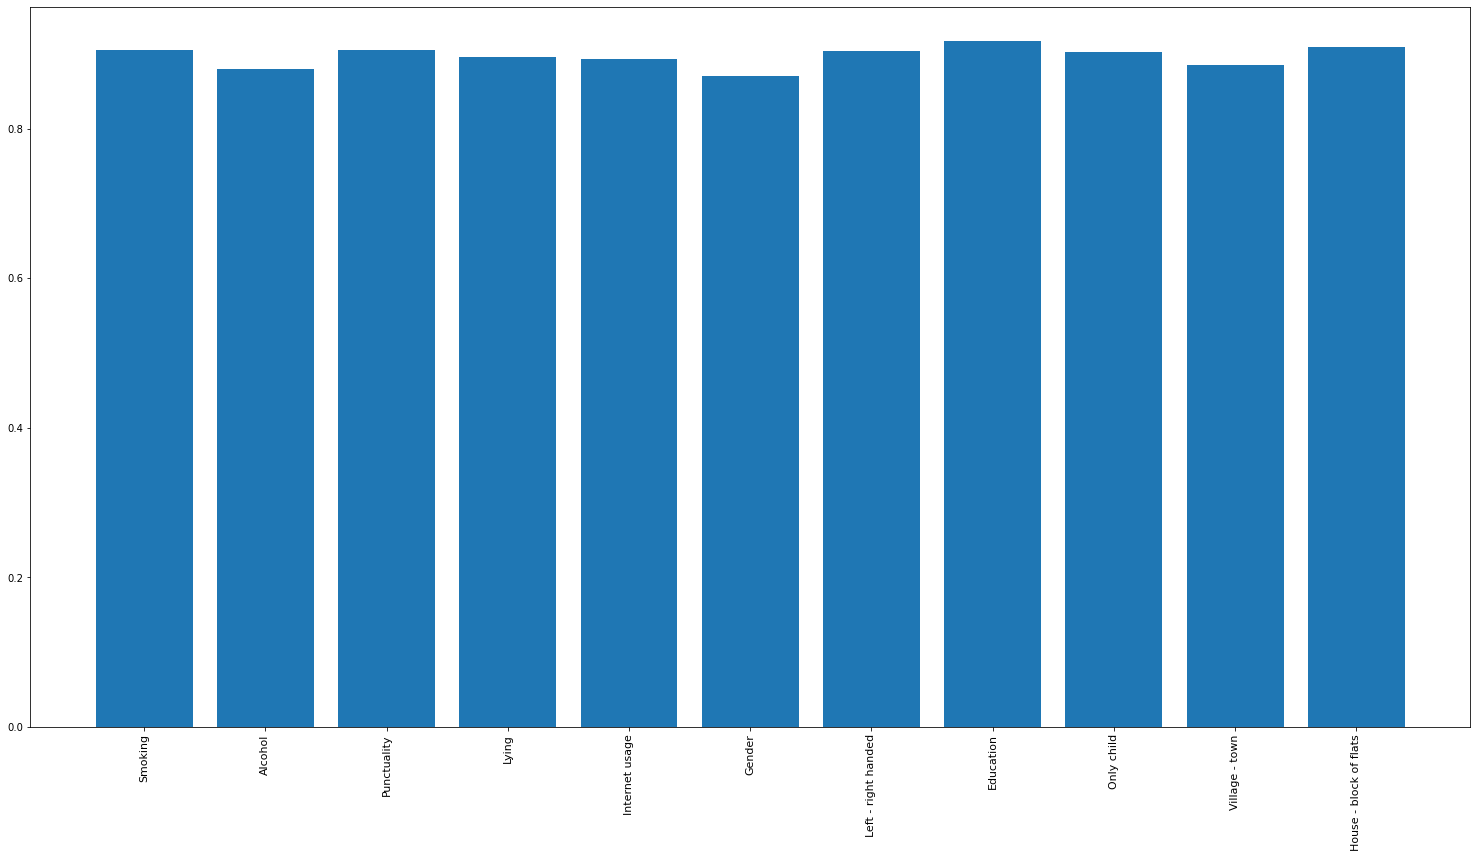

In [436]:
# train the model on all the features without considering the PCA slection results 
mode_acc_all = []
targets = []
dataset = responses_nona.copy()
#responses_normalized
for i in tqdm(cols):
    mode = Mode_Model(i, dataset)   
    mode.prepare_data()
    mode.predict_data()
    mode_acc_all.append(mode.accuracy())
    targets.append(i)
labels = targets
fig = px.bar(x=labels , y=mode_acc_all)
plotly.offline.iplot(fig) 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, mode_acc_all)
plt.xticks(fontsize = 11, rotation='90')
plt.show()

## Neural Network Model

In [441]:
# One hidden layer neural network with forward/backward propagation and cross entropy for loss calculation
# start by fitting the model with sigmid transfer function, relu activation function and backward propagation with 
# derivative of these functions, calculate loss, and accuracy.
class NeuralNetwork:
    # initialize the network number of epochs, hidden layers, learning rate
    def __init__(self, hidden_layers, epochs=10, learning_rate=1, print_it=True):
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.iterations = epochs
        self.loss = []
        self.acc = []
        self.print_it = print_it
    # initialize the input weights and biases, and the hidden layer output weights and biases
    def prepare_data(self, x, y):
        self.input_w = np.random.randn(self.hidden_layers, x.shape[1]) * 0.01
        self.input_b = np.zeros((self.hidden_layers, 1))
        self.output_w = np.random.randn(y.shape[1], self.hidden_layers) * 0.01
        self.output_b = np.zeros((y.shape[1], 1))
    
    # transfer function
    def relu(self, z):
        return z * (z > 0)
    
    # activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    # cross entropy loss function
    def loss_function(self, y):
        loss = - (y.T * np.log(self.layer2) + (1-y.T) * np.log(1-self.layer2)).mean() 
        return loss
    # accuracy function
    def accuracy(self, y, pred_y):
        count = 0  
        for i in range(len(y)):
            y_i = y[i].argmax(axis=0)
            y_pred_i = pred_y[i].argmax(axis=0)
            if int(y_i) == int(y_pred_i):
                count+=1
        return count/len(y)
    
    # forward propagation first layer multiply weights by input adding bias and use transfer function
    # pass the results to activation layer after multiply the output by the weights of the output layer
    def forward_propagation(self, x):
        self.layer1 = self.relu(np.dot(self.input_w, x.T) + self.input_b)
        self.layer2 = self.sigmoid(np.dot(self.output_w, self.layer1) + self.output_b)
        
    # backward propagation to find the error and update the weights
    def backward_propagation(self, x, y):
        m = x.shape[1]
        dz_layer2 = (self.layer2 - y.T) * (self.sigmoid_derivative(self.layer2))
        d_w_layer2 = (1 / m) * np.dot(dz_layer2, self.layer1.T)
        d_b_layer2 = (1 / m) * np.sum(dz_layer2, axis=1, keepdims=True)
        dz_layer1 = np.dot(self.output_w.T, dz_layer2) * (self.layer1 > 0) 
        d_w_layer1 = (1 / m) * np.dot(dz_layer1, x)
        d_b_layer1 = (1 / m) * np.sum(dz_layer1, axis=1, keepdims=True)
        self.input_w -= self.learning_rate * d_w_layer1
        self.input_b -= self.learning_rate * d_b_layer1
        self.output_w -= self.learning_rate * d_w_layer2
        self.output_w -= self.learning_rate * d_b_layer2

    # Fit the data using forward propagation,backward propagation
    # Calculating the loss and accuracy of prediction and repeat epochs time
    def fit(self, x, y):
        self.prepare_data(x, y)
        for i in range(self.iterations):
            self.forward_propagation(x)
            self.backward_propagation(x, y)
            loss = self.loss_function(y)
            pr = self.predict(x)
            acc = self.accuracy(y, pr)
            self.acc.append(acc)
            self.loss.append(loss)
            if i%20 ==0 and i!=0 and self.print_it:
                print(" Epoch: " + str(i) + " Loss: " + str(loss))

    def predict(self, x):
        self.forward_propagation(x)
        return self.layer2.T


## Model Training

100%|██████████| 11/11 [01:21<00:00,  7.43s/it]


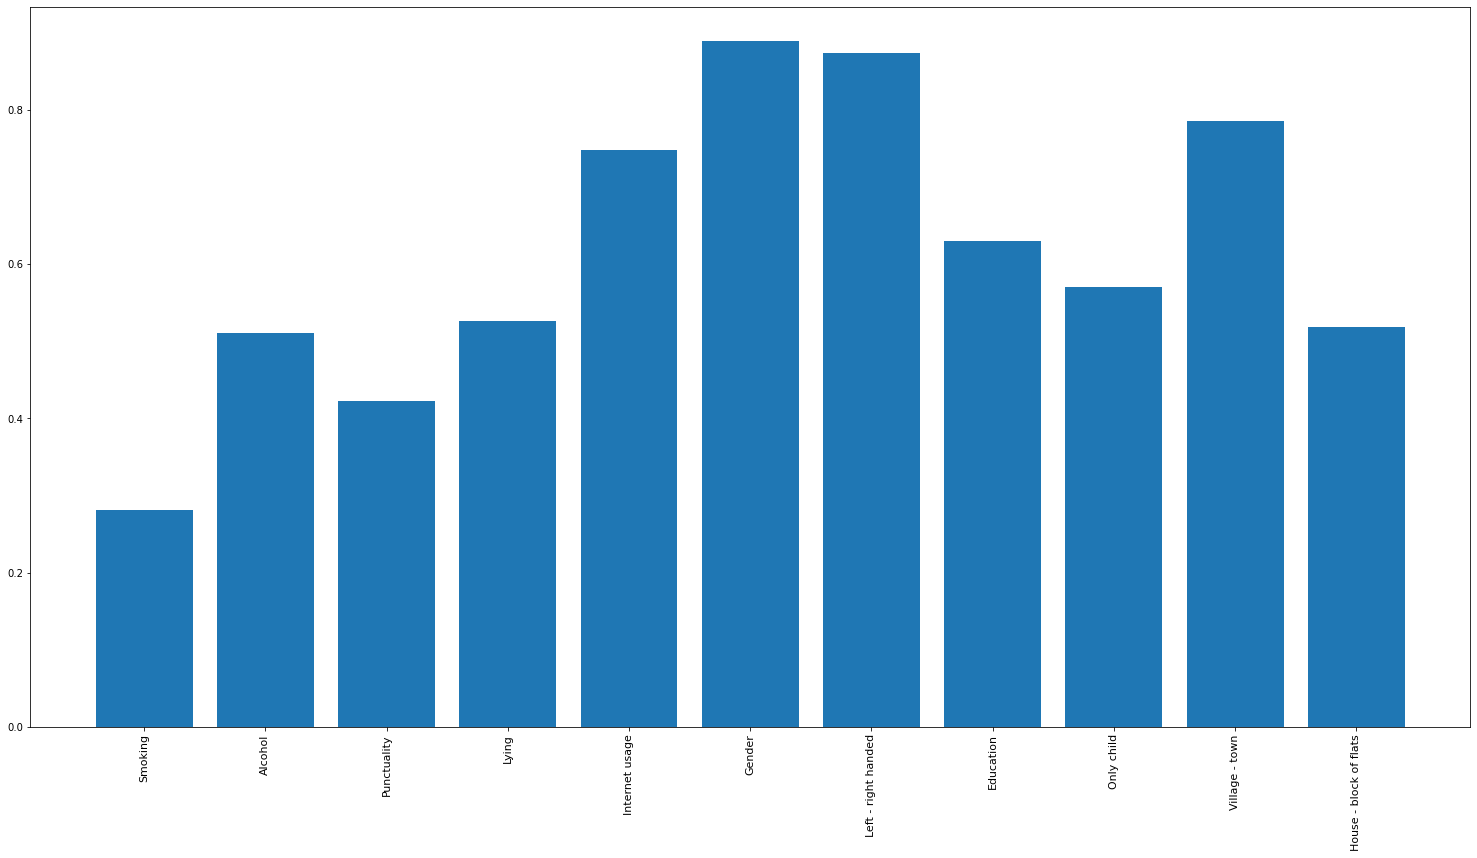

In [442]:
# train the model on all the features with .1 learning rate
acc_all = []
targets = []
dataset = responses_normalized.copy()
#responses_normalized
for i in tqdm(cols):
    x_tr,y_tr,x_te,y_te = split_data_category(dataset, i, .8)
    nn = NeuralNetwork(250,1550, .1, False)
    nn.fit(x_tr, y_tr)
    y_pred = nn.predict(x_te)
    acc_all.append(nn.accuracy(y_te,y_pred))
    targets.append(i)
labels = targets
fig = px.bar(x=labels , y=acc_all)
plotly.offline.iplot(fig)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, acc_all)
plt.xticks(fontsize = 11, rotation='90')
plt.show()

100%|██████████| 11/11 [01:20<00:00,  7.35s/it]


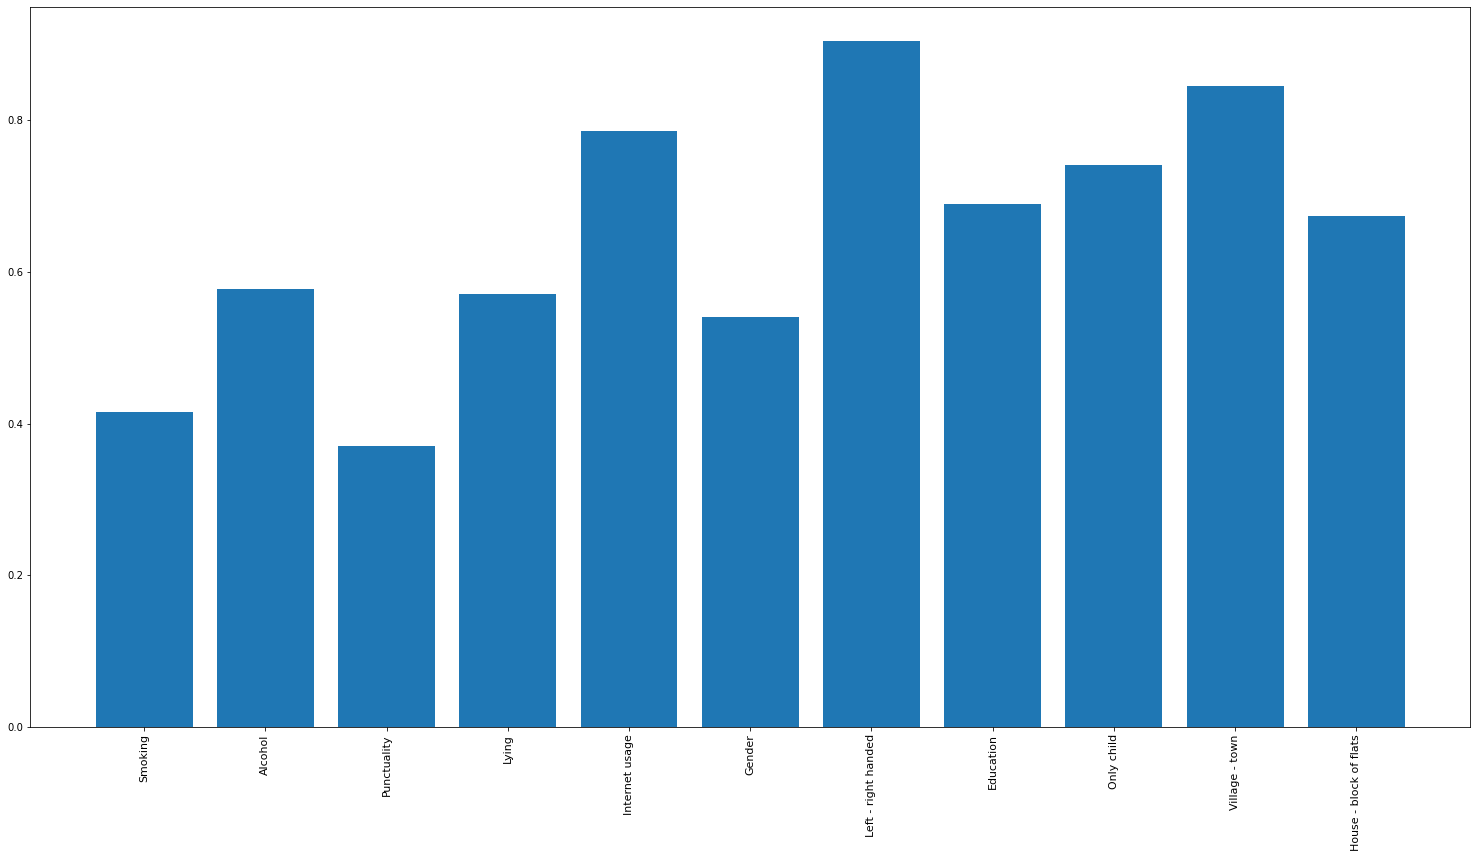

In [443]:
# train the model on all the features with .001 learning rate
acc_all_2 = []
targets = []
dataset = responses_normalized.copy()
#responses_normalized
for i in tqdm(cols):
    x_tr,y_tr,x_te,y_te = split_data_category(dataset, i, .8)
    nn = NeuralNetwork(250,1550, .001, False)
    nn.fit(x_tr, y_tr)
    y_pred = nn.predict(x_te)
    acc_all_2.append(nn.accuracy(y_te,y_pred))
    targets.append(i)
labels = targets
fig = px.bar(x=labels , y=acc_all_2)
plotly.offline.iplot(fig)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, acc_all_2)
plt.xticks(fontsize = 11, rotation='90')
plt.show()

In [452]:
# compare the accuracy between learning rate .1 and .001
import plotly.graph_objects as go
print("NN with l=.1")
print(acc_all)
print("NN with l=.001")
print(acc_all_2)
trace1 = go.Bar(
   x = labels,
   y = acc_all,
   name = 'NN with l=.1'
)
trace2 = go.Bar(
   x = labels,
   y = acc_all_2,
   name = 'NN with l=.001'
)
data = [trace1, trace2]
layout = go.Layout(barmode = 'group',xaxis=dict(title="Categorical Columns"),yaxis=dict(title="Accuracy"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)
print("please refer to the html file if the figure doesn't appear")

NN with l=.1
[0.25925925925925924, 0.5777777777777777, 0.42962962962962964, 0.43703703703703706, 0.7555555555555555, 0.8814814814814815, 0.8666666666666667, 0.4962962962962963, 0.6666666666666666, 0.674074074074074, 0.5185185185185185]
NN with l=.001
[0.4148148148148148, 0.5777777777777777, 0.37037037037037035, 0.5703703703703704, 0.7851851851851852, 0.5407407407407407, 0.9037037037037037, 0.6888888888888889, 0.7407407407407407, 0.8444444444444444, 0.674074074074074]


please refer to the html file if the figure doesn't appear


In [446]:
# train the model on selected. features for each target feature and compare the accuracy for each used percentage
acc_all = []
targets = []
data = []
parti = []
l = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for j in tqdm(l):
    acc_all = []
    for i in cols:
        dataset = responses_normalized.copy()
        x_tr,y_tr,x_te,y_te,part = split_data_category_select_features(dataset, i, .8,j)
        nn = NeuralNetwork(x_tr.shape[1]+10,1550, .1, False)
        nn.fit(x_tr, y_tr)
        y_pred = nn.predict(x_te)
        parti.append(part)
        acc = nn.accuracy(y_te,y_pred)
        acc_all.append(acc)
        targets.append(str(i))
    trace1 = go.Bar(
      x = labels,
      y = acc_all,
      name = j
    )
    data.append(trace1)

layout = go.Layout(barmode = 'group',xaxis=dict(title="data prec"),yaxis=dict(title="Accuracy"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)
print("please refer to the html file if the figure doesn't appear")

100%|██████████| 10/10 [08:08<00:00, 48.90s/it]


please refer to the html file if the figure doesn't appear


In [447]:
# Loss for all features on learning rate .1
loss_all = []
targets = []
data = []
dataset = responses_normalized
#responses_normalized
for i in tqdm(cols):
    x_tr,y_tr,x_te,y_te = split_data_category(dataset, i, .8)
    nn = NeuralNetwork(250,1550, .1, False)
    nn.fit(x_tr, y_tr)
    loss_all.append(nn.loss)
    y_pred = nn.predict(x_te)
    targets.append(i)
labels = targets
for i in range(len(targets)):
    trace1 = go.Line(
       x = np.arange(0,1550),
       y = loss_all[i],
       name = targets[i]
    )
    data.append(trace1)

100%|██████████| 11/11 [01:21<00:00,  7.41s/it]


In [448]:
layout = go.Layout(barmode = 'group',xaxis=dict(title="epochs"),yaxis=dict(title="Loss"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)
print("please refer to the html file if the figure doesn't appear")

please refer to the html file if the figure doesn't appear


In [449]:
#Loss on training rate = .001
loss_all = []
targets = []
data = []
dataset = responses_normalized
#responses_normalized
for i in tqdm(cols):
    x_tr,y_tr,x_te,y_te = split_data_category(dataset, i, .8)
    nn = NeuralNetwork(250,1550, .001, False)
    nn.fit(x_tr, y_tr)
    loss_all.append(nn.loss)
    y_pred = nn.predict(x_te)
    targets.append(i)
labels = targets
for i in range(len(targets)):
    trace1 = go.Line(
       x = np.arange(0,1550),
       y = loss_all[i],
       name = targets[i]
    )
    data.append(trace1)

100%|██████████| 11/11 [01:20<00:00,  7.32s/it]


In [450]:
layout = go.Layout(barmode = 'group',xaxis=dict(title="epochs"),yaxis=dict(title="Loss"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)
print("please refer to the html file if the figure doesn't appear")

please refer to the html file if the figure doesn't appear


In [451]:
# compare nn with learning rate .001 and mode model
import plotly.graph_objects as go
print("Neural Network Model Accuracy")
print(acc_all)
print("Mode Model Accuracy")
print(mode_acc_all)
trace1 = go.Bar(
   x = labels,
   y = acc_all,
   name = 'Neural Network Model'
)
trace2 = go.Bar(
   x = labels,
   y = mode_acc_all,
   name = 'Mode Model'
)
data = [trace1, trace2]
layout = go.Layout(barmode = 'group',xaxis=dict(title="Categorical Columns"),yaxis=dict(title="Accuracy"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)
print("please refer to the html file if the figure doesn't appear")

Neural Network Model Accuracy
[0.25925925925925924, 0.5777777777777777, 0.42962962962962964, 0.43703703703703706, 0.7555555555555555, 0.8814814814814815, 0.8666666666666667, 0.4962962962962963, 0.6666666666666666, 0.674074074074074, 0.5185185185185185]
Mode Model Accuracy
[0.9050445103857567, 0.8798219584569733, 0.9050445103857567, 0.8961424332344213, 0.8931750741839762, 0.870919881305638, 0.9035608308605341, 0.9169139465875371, 0.9020771513353116, 0.8857566765578635, 0.9094955489614244]


please refer to the html file if the figure doesn't appear


# Regression Model
## Basic Agent Model - Mean
### The Model

In [453]:
# the basic mean model replace each missing value with the mean
class Mean_Model():
    def __init__(self, column_name, df_original):
        self.column_name = column_name
        self.df_original = df_original
        
    def prepare_data(self):
        r_df = self.df_original.copy()
        r_df[self.column_name] = r_df[self.column_name].mask(np.random.random(r_df[self.column_name].shape) < .1)
        self.r_df_nona = r_df.dropna(inplace = False)
        self.r_df = r_df
    
    def predict_data(self):
        mean = sum(self.r_df_nona[self.column_name])/len(self.r_df_nona[self.column_name])
        r_df = self.r_df[self.column_name].fillna(mean)
        self.pred = r_df
        self.real = self.df_original[self.column_name]
        
    def mse(self):
        err = 0
        for i in range(len(self.pred)):
            err += ((self.real.values[i] - self.pred.values[i])**2)    
        mse = err/len(self.pred)
        return mse 

### Training and Testing 

100%|██████████| 139/139 [00:00<00:00, 220.26it/s]


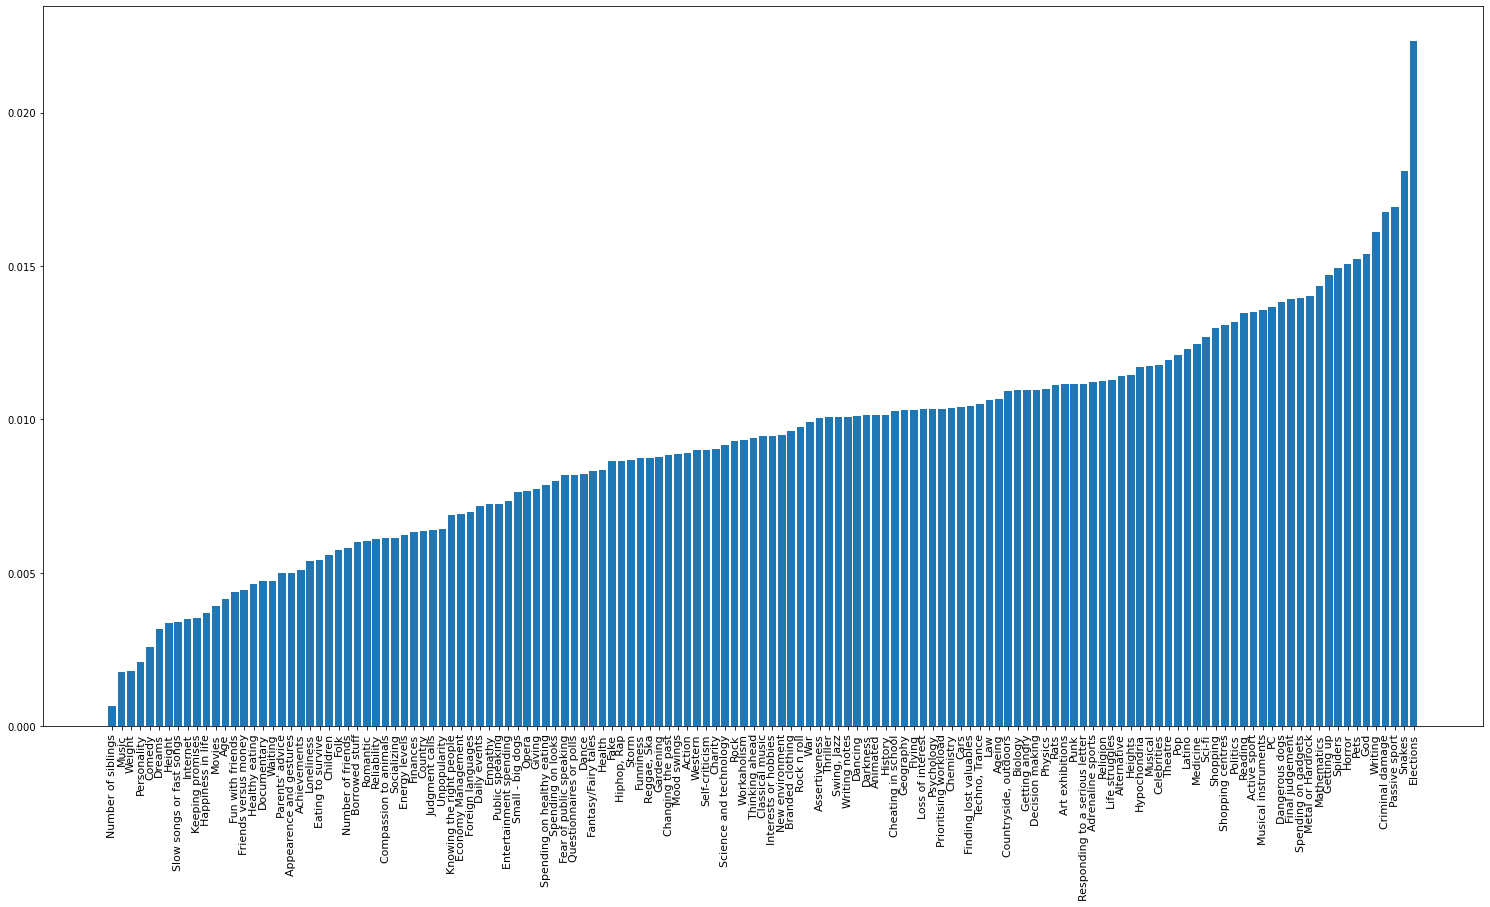

In [454]:
# MSE comparison for each numerical feature as a target 
mean_mse_all = []
mean_targets = []
dataset = responses_normalized.copy()
#responses_normalized
for i in tqdm(num_cols):
        mean = Mean_Model(i, dataset)   
        mean.prepare_data()
        mean.predict_data()
        mean_mse_all.append(mean.mse())
        mean_targets.append(i)
labels = mean_targets
Z = [x for _,x in sorted(zip(mean_mse_all,labels))]
fig = px.bar(x=Z , y=sorted(mean_mse_all), title="MSE Mean")
plotly.offline.iplot(fig)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(Z, sorted(mean_mse_all))
plt.xticks(fontsize = 11, rotation='90')
plt.show()

## Linear Regression
### The model

In [493]:
# Linear regression using lasso and ridge
class Linear_Regression:
    def __init__(self, x_tr, y_tr, reg = "lasso"):
        self.x_tr = x_tr
        self.y_tr = y_tr
        self.reg = reg
    def fit_data_lasso(self,num_iter,l):
        all_w =[]
        x, y = self.x_tr, self.y_tr
        w = [.01]*(x.shape[1])
        for i in range(num_iter):
            old_weights = w
            for i in range(len(w)):
                temp1 = (np.matmul(x[:,i].T,(y - np.matmul(x,w))) - (l/2))/((np.matmul(x[:,i].T, x[:,i])))
            
                temp2 = (np.matmul(x[:,i].T,(y - np.matmul(x,w))) + (l/2))/((np.matmul(x[:,i].T, x[:,i])))
                if  w[i]> -1*temp1 :
                    w[i] = w[i] + temp1
                elif w[i] < -1*temp2 :
                    w[i] = w[i] + temp2
                else:
                    w[i] = 0
        self.w =w            
        return w
    
    def fit_data_ridge(self,l):
        x, y = self.x_tr, self.y_tr
        xt = self.x_tr.transpose()
        xtx_mult = np.matmul(xt, x)
        Ident = l*np.identity(len(x[0]), dtype = float)
        addit = xtx_mult+ Ident
        inv= np.linalg.inv(addit)
        res = np.matmul(inv, xt)
        w = np.matmul(res, y)
        self.w =w
        return w

    def predict_data_lasso(self,x):
        self.pred = np.matmul(x,self.w)
        return self.pred
    
    def predict_data_ridge(self,x):
        self.pred = np.matmul(x,self.w)
        return self.pred   
    def fit_data(self,l,num_iter =0):
        if self.reg == "lasso":
            return self.fit_data_lasso(num_iter,l)
        else:
            return self.fit_data_ridge(l)
    def predict(self,x):
        if self.reg == "lasso":
            return self.predict_data_lasso(x)
        else:
            return self.predict_data_ridge(x)      
    def mse(self,y_te):
        self.real = y_te
        mse = sum((self.real - self.pred)**2)/len(self.pred)
        return mse

### Training and Testing
### Lasso Regression

100%|██████████| 400/400 [10:00<00:00,  1.50s/it]


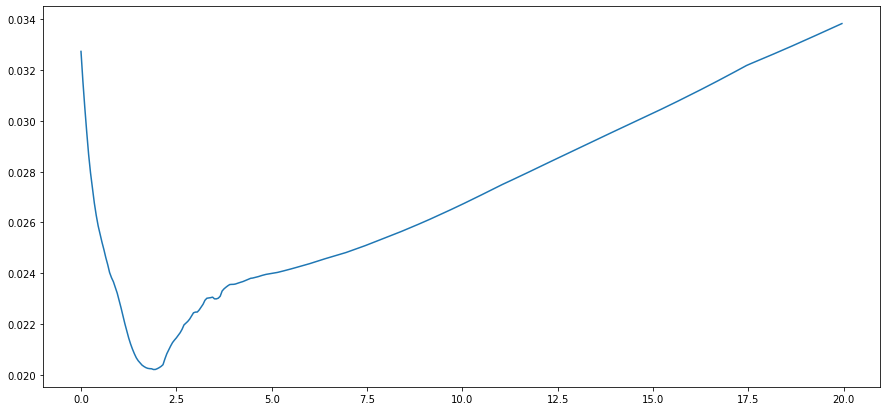

In [456]:
dataset = responses_normalized    
x_tr,y_tr,x_te,y_te = split_data_dataframe(dataset,"Age", .8)
lasso = Linear_Regression(x_tr, y_tr, reg = "lasso") 
l = np.arange(0, 20, .05)
mse1 = []
for i in tqdm(l):
    w = lasso.fit_data(i,100)
    lasso.predict(x_te)
    mse1.append(lasso.mse(y_te))
x = np.arange(0, len(l), 1)   
fig = px.line(x=l, y=mse1, title='MSE Lasso')
plotly.offline.iplot(fig)
fig = plt.figure(figsize=(15, 7))
plt.plot(l,mse1)

In [457]:
lasso_lambda = l[mse1.index(min(mse1))]
lasso_lambda

1.9000000000000001

100%|██████████| 139/139 [03:39<00:00,  1.58s/it]


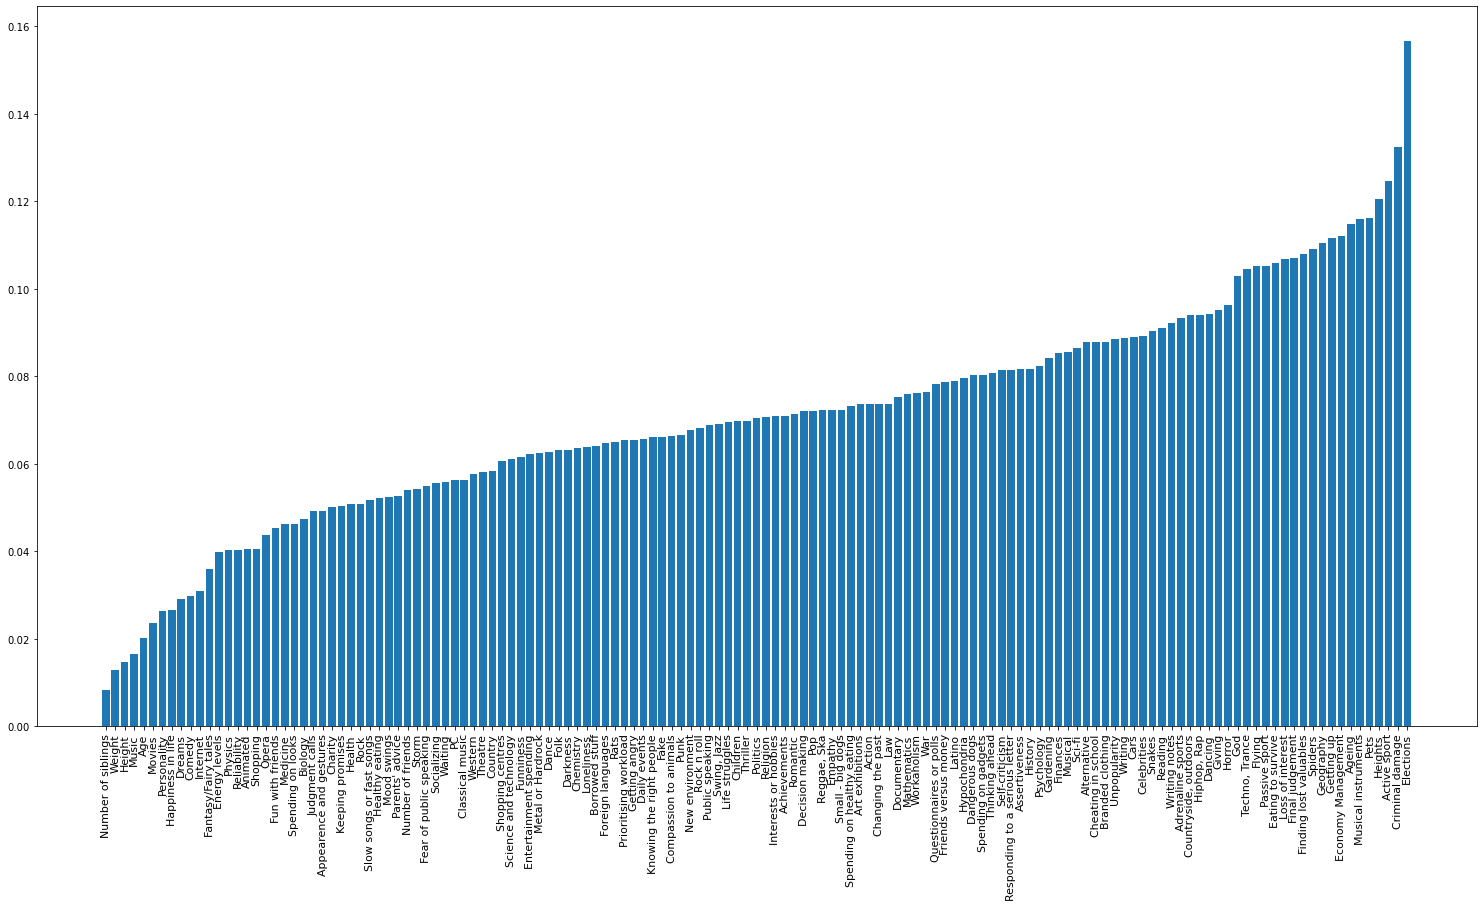

In [458]:
# Lasso regression mse for all numerical features for best lambda found
mse_all = []
target = []
ws = []
dataset = responses_normalized
for i in tqdm(num_cols):
    x_tr,y_tr,x_te,y_te = split_data_dataframe(dataset,i, .8)
    lasso = Linear_Regression(x_tr, y_tr, reg = "lasso") 
    w = lasso.fit_data(lasso_lambda , 100)
    ws.append(w)
    lasso.predict(x_te)
    mse_all.append(lasso.mse(y_te))
    target.append(i)
labels = target
Z = [x for _,x in sorted(zip(mse_all,labels))]    
fig = px.bar(x=Z, y=sorted(mse_all), title='MSE Per Column')
plotly.offline.iplot(fig)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(Z, sorted(mse_all))
plt.xticks(fontsize = 11, rotation='90')
plt.show()

### Ridge Regression

100%|██████████| 1800/1800 [00:02<00:00, 825.53it/s]


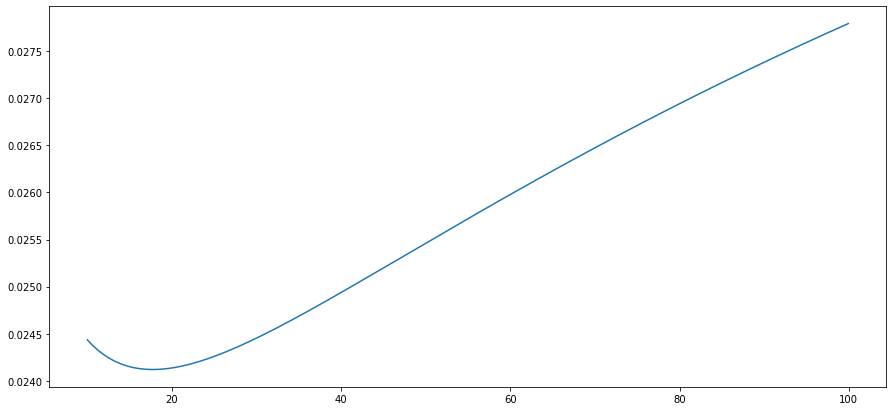

In [403]:
dataset = responses_normalized    
x_tr,y_tr,x_te,y_te = split_data_dataframe(dataset,"Age", .8)
ridge = Linear_Regression(x_tr, y_tr, reg = "ridge") 
l = np.arange(10, 100, .05)
mse1 = []
for i in tqdm(l):
    w = ridge.fit_data(i)
    ridge.predict(x_te)
    mse1.append(ridge.mse(y_te))
x = np.arange(0, len(l), 1)   
fig = px.line(x=l, y=mse1)
plotly.offline.iplot(fig)
fig = plt.figure(figsize=(15, 7))
plt.plot(l,mse1)

In [134]:
ridge_lambda = l[mse1.index(min(mse1))]
ridge_lambda

17.70000000000011

In [463]:
irrel_features={}
for i in range(len(ws)):
    for l in range(len(ws[i])):
        if ws[i][l] == 0:
            if num_cols[i] in irrel_features.keys():
                irrel_features[num_cols[i]].append(dataset.columns.values[l])
            else:     
                irrel_features[num_cols[i]] = [dataset.columns.values[l]]
irrel_features

{'Music': ['Slow songs or fast songs',
  'Dance',
  'Folk',
  'Classical music',
  'Rock',
  'Metal or Hardrock',
  'Punk',
  'Hiphop, Rap',
  'Reggae, Ska',
  'Swing, Jazz',
  'Alternative',
  'Latino',
  'Horror',
  'Comedy',
  'Romantic',
  'Sci-fi',
  'War',
  'Animated',
  'Documentary',
  'Western',
  'Action',
  'History',
  'Psychology',
  'Mathematics',
  'Internet',
  'Economy Management',
  'Biology',
  'Chemistry',
  'Reading',
  'Medicine',
  'Law',
  'Art exhibitions',
  'Musical instruments',
  'Passive sport',
  'Active sport',
  'Gardening',
  'Celebrities',
  'Shopping',
  'Science and technology',
  'Fun with friends',
  'Adrenaline sports',
  'Pets',
  'Flying',
  'Storm',
  'Darkness',
  'Snakes',
  'Rats',
  'Ageing',
  'Fear of public speaking',
  'Healthy eating',
  'Daily events',
  'Prioritising workload',
  'Writing notes',
  'Workaholism',
  'Thinking ahead',
  'Reliability',
  'Keeping promises',
  'Loss of interest',
  'Friends versus money',
  'Funniness'

100%|██████████| 139/139 [00:00<00:00, 306.08it/s]


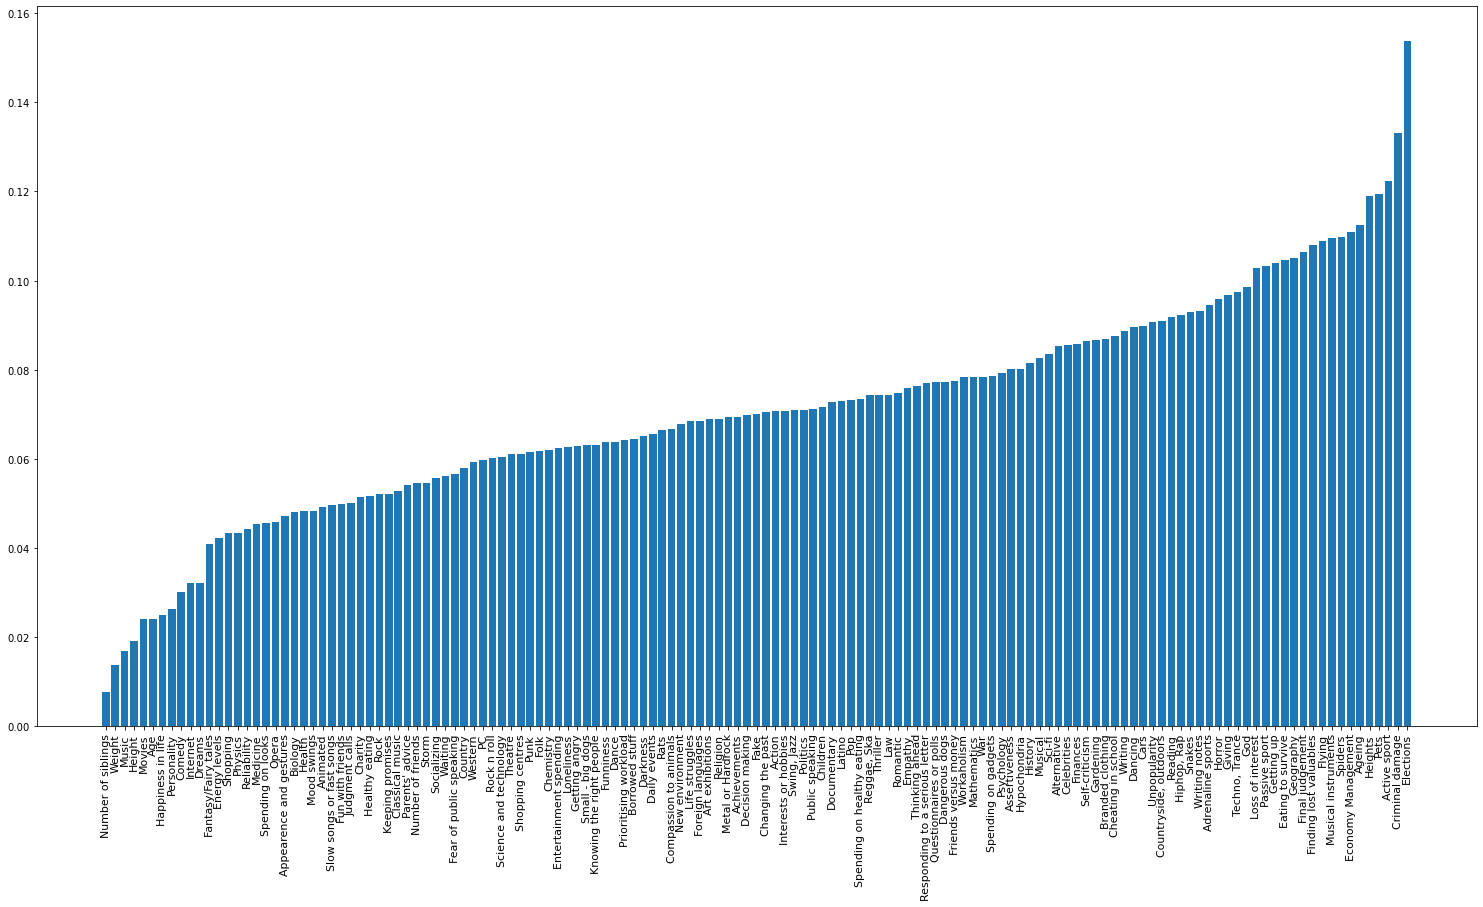

In [503]:
ridge_mse_all = []
ridge_target = []

for i in tqdm(num_cols):
    dataset = responses_normalized.copy()    
    x_tr,y_tr,x_te,y_te = split_data_dataframe(dataset,i, .8)
    ridge = Linear_Regression(x_tr, y_tr, reg = "ridge") 
    w = ridge.fit_data(ridge_lambda)
    ridge.predict(x_te)
    ridge_mse_all.append(ridge.mse(y_te))
    ridge_target.append(i)
labels = ridge_target    
Z = [x for _,x in sorted(zip(ridge_mse_all,labels))]
fig = px.bar(x=Z , y=sorted(ridge_mse_all))
plotly.offline.iplot(fig)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(Z, sorted(ridge_mse_all))
plt.xticks(fontsize = 11, rotation='90')
plt.show()

In [471]:
import plotly.graph_objects as go
trace1 = go.Bar(
   x = ridge_target,
   y = ridge_mse_all,
   name = 'Ridge'
)
trace2 = go.Bar(
   x = target,
   y = mse_all,
   name = 'Lasso'
)
trace3 = go.Bar(
   x = target,
   y = mean_mse_all,
   name = 'Mean'
)
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = 'group',xaxis=dict(title="Numerical Columns"),yaxis=dict(title="MSE"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)

# Generate Data

In [515]:
to_generate.isna().sum()

Music                             3 
Slow songs or fast songs          2 
Dance                             4 
Folk                              5 
Country                           5 
Classical music                   7 
Musical                           2 
Pop                               3 
Rock                              6 
Metal or Hardrock                 3 
Punk                              8 
Hiphop, Rap                       4 
Reggae, Ska                       7 
Swing, Jazz                       6 
Rock n roll                       7 
Alternative                       7 
Latino                            8 
Techno, Trance                    7 
Opera                             1 
Movies                            6 
Horror                            2 
Thriller                          1 
Comedy                            3 
Romantic                          3 
Sci-fi                            2 
War                               2 
Fantasy/Fairy tales               3 
A

In [140]:
to_generate = responses_generate.copy()
to_generate_sum = to_generate.isna().sum()
features_na_sorted = to_generate_sum.sort_values().keys()[6:]
features_with_no_na = to_generate_sum.sort_values().keys()[:6]
print(features_with_no_na)
print(features_na_sorted)

Index(['Internet usage', 'Eating to survive', 'Number of friends', 'Dreams',
       'Spending on gadgets', 'Snakes'],
      dtype='object')
Index(['Law', 'Musical instruments', 'Thriller', 'Opera', 'Storm', 'Fake',
       'Loneliness', 'Keeping promises', 'Education', 'Health',
       ...
       'Theatre', 'Punk', 'Smoking', 'Latino', 'Documentary', 'Geography',
       'Chemistry', 'Passive sport', 'Height', 'Weight'],
      dtype='object', length=144)


In [141]:
to_generate[to_generate['Internet usage'].isna()]

Empty DataFrame
Columns: [Music, Slow songs or fast songs, Dance, Folk, Country, Classical music, Musical, Pop, Rock, Metal or Hardrock, Punk, Hiphop, Rap, Reggae, Ska, Swing, Jazz, Rock n roll, Alternative, Latino, Techno, Trance, Opera, Movies, Horror, Thriller, Comedy, Romantic, Sci-fi, War, Fantasy/Fairy tales, Animated, Documentary, Western, Action, History, Psychology, Politics, Mathematics, Physics, Internet, PC, Economy Management, Biology, Chemistry, Reading, Geography, Foreign languages, Medicine, Law, Cars, Art exhibitions, Religion, Countryside, outdoors, Dancing, Musical instruments, Writing, Passive sport, Active sport, Gardening, Celebrities, Shopping, Science and technology, Theatre, Fun with friends, Adrenaline sports, Pets, Flying, Storm, Darkness, Heights, Spiders, Snakes, Rats, Ageing, Dangerous dogs, Fear of public speaking, Smoking, Alcohol, Healthy eating, Daily events, Prioritising workload, Writing notes, Workaholism, Thinking ahead, Final judgement, Reliability, Keeping promises, Loss of interest, Friends versus money, Funniness, Fake, Criminal damage, Decision making, Elections, Self-criticism, Judgment calls, Hypochondria, Empathy, Eating to survive, Giving, Compassion to animals, Borrowed stuff, Loneliness, ...]
Index: []

# Data Pipeline 
## Predict on the dataset with missing data - Numerical
- Start with the dataset with missing values which was around 40% of the original data X 
- Start with numerical features
- Pick the features with the least na values a, get all records that a exists in with missing value
- Choose subset of X features that are correlated to Y
- If there is any other feature that is missing with the same record add it as a target
- We will end up with k number of features
- Get the k features from the testing data F
- Fit the model on the filtered testing data F
- Normalize the dataset we want to predict the target feature on (X)
- Pass each record in dataset X for prediction
- Add the predicted values to X, so we will use it for other features predictions
- Denormalize and add it to the last dataset where we fill data with no missing values
- Repeat until we have no missing values


100%|██████████| 144/144 [00:24<00:00,  5.83it/s]


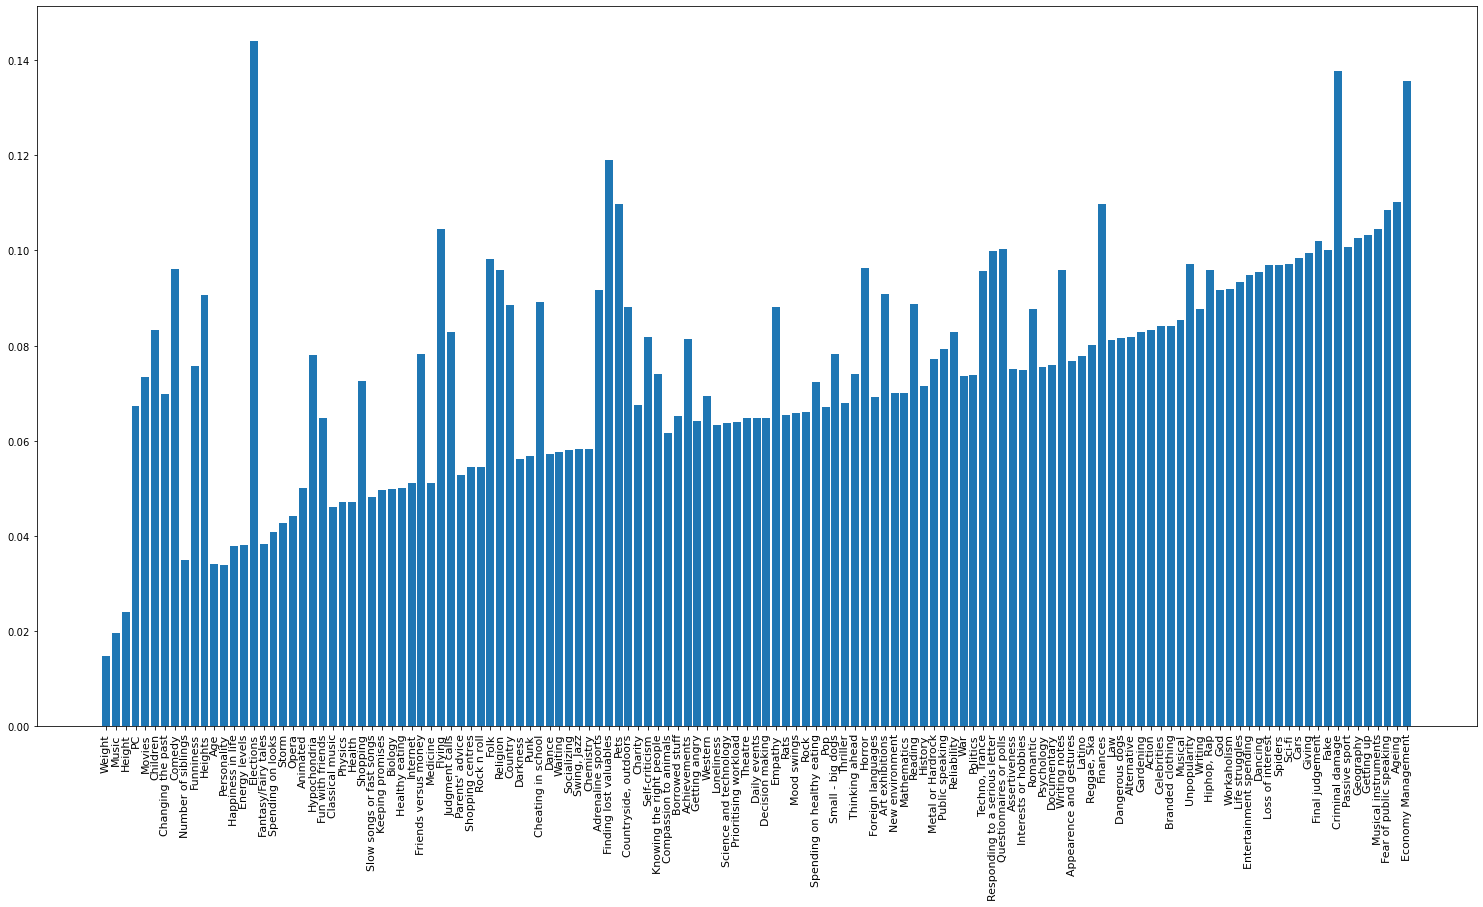

In [504]:
import math
def denorm(bef, d, column ):
    h = bef.copy().dropna()
    minn = min(h[column])
    maxx = max(h[column])
    f = (d *(maxx - minn))+ minn
    return math.ceil(f)
def normalize(bef, d ):
    h = bef.copy().dropna()
    for i in d.columns:
         d[i] = (d[i]  - min(h[i]))/(max(h[i])-min(h[i]))
    return d
new_data = to_generate.copy()
a = []
ridge_mse_all = []
ridge_target = []
for colum in tqdm(features_na_sorted):
    if colum in num_cols:
        if colum in correlated_columns.keys():
            c = np.append(correlated_columns[colum], colum)
            dataset = responses_normalized.copy()[c]
            x = new_data[new_data[colum].isna()][c]
        else :
            dataset = responses_normalized.copy()[num_cols]
            x = new_data[new_data[colum].isna()][num_cols]
        for index, row in x.iterrows():
            curr_data = row.to_frame().T
            na_cols_row = row[row.isna()].index.values
            if len(na_cols_row)>=1:
                to_drop = na_cols_row
            else: to_drop = [colum]
            curr_data = curr_data.drop(to_drop, axis=1)
            curr_data_normalized = normalize(responses, curr_data)
            if set(na_cols_row).issubset(set(curr_data.columns)):
                curr_data = curr_data.drop(na_cols_row,1)
            indices = curr_data.index
            m = np.array(curr_data.columns)
            m = np.append(m, to_drop)
            dataset = dataset[m]
            x_tr,y_tr,x_te,y_te = split_data_dataframe(dataset,to_drop, .8)
            ridge = Linear_Regression(x_tr, y_tr, reg = "ridge") 
            w = ridge.fit_data(ridge_lambda , 100)
            pred = ridge.predict(x_te)
            mse = ridge.mse(y_te)
            ridge_mse_all.append(mse[0])
            ridge_target.append(colum)
            predictions = ridge.predict(np.array(curr_data))[0]
            for i in range(len(predictions)):
                c = to_drop[i]
                den = denorm(responses, predictions[i], c)
                new_data.at[index,c] =  den if not math.isnan(den) else 0
                
Z = [x for _,x in sorted(zip(ridge_mse_all,ridge_target))]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(Z, sorted(ridge_mse_all))
plt.xticks(fontsize = 11, rotation='90')
plt.show()             

In [507]:
new_data.isna().sum()

Music                             0
Slow songs or fast songs          0
Dance                             0
Folk                              0
Country                           0
Classical music                   0
Musical                           0
Pop                               0
Rock                              0
Metal or Hardrock                 0
Punk                              0
Hiphop, Rap                       0
Reggae, Ska                       0
Swing, Jazz                       0
Rock n roll                       0
Alternative                       0
Latino                            0
Techno, Trance                    0
Opera                             0
Movies                            0
Horror                            0
Thriller                          0
Comedy                            0
Romantic                          0
Sci-fi                            0
War                               0
Fantasy/Fairy tales               0
Animated                    

# Data Pipeline 
## Predict on the dataset with missing data - Categorical
- Predic on the dataset with missing data - Categorical
- Start with the dataset with missing values which was around 40% of the original data X
- Next we predict the categorical features
- Pick the features with the least na values a, get all records that a exists in with missing value
- If there is any other feature with missing values in the same record we add it as a target as well.
- We will end up with k number of features
- Get the k features from the testing data F
- Fit the model on the filtered testing data F
- Normalize the dataset we want to predict the target features on (X)
- Encode the categorical features using one-hot encoding
- Pass each record in dataset X for prediction
- Add the predicted values to X, so we will use it for other features predictions
- Reverse the one-hot encoding and add the record to the last dataset where we fill data with no missing values
- Repeat until we have no missing values

In [509]:
def split_data_category(dataset,target, percentage, isarr = False):
    t = [] 
    s = []
    t_all = []
    d = dataset.copy()
    if not isarr:
        t =[col for col in d.columns if col.startswith(target)]
    else:
        for targets in target:
            t_all.append([col for col in d.columns if col.startswith(targets)]) 
            for col in d.columns:
                if col.startswith(targets):
                    t.append(col)
    for j in cols:
        for col in d.columns:
            if col.startswith(j):
                s.append(col)
    last_t = []
    y =  d[t] 
    d.drop(t, 1, inplace=True)
    #d.drop(t,1,inplace=True)
    latest = d.copy()
    x = np.array(latest)
    y = np.array(y)
    x_tr = x[:int(percentage*len(x)),]
    x_te = x[int(percentage*len(x)):,]
    y_tr = y[:int(percentage*len(y)),]
    y_te = y[int(percentage*len(y)):,]
    return np.array(x_tr),np.array(y_tr),np.array(x_te),np.array(y_te),t_all

In [510]:
to_generate_new = new_data.copy()
a = []
dataset = responses_normalized.copy()
for i in tqdm(cat_cols_new):
        dataset = responses_normalized.copy()
        x = to_generate_new[to_generate_new[i].isna()]
        q = x[x[i].isna()]
        if len(q)>0:
            all_columns_wth_na = q.columns[q.isnull().any()].values
            x = x.drop(all_columns_wth_na,1)
            x = encode_categorical_features(x)
            n = Normalize(x)
            to_generate_normalized = n.normalize()
            if set(all_columns_wth_na).issubset(set(to_generate_normalized.columns)):
                to_generate_normalized = to_generate_normalized.drop(all_columns_wth_na,1)   
            indices = to_generate_normalized.index
            x_tr,y_tr,x_te,y_te, t_all = split_data_category(dataset, all_columns_wth_na, .8,True)
            nn = NeuralNetwork(len(x_tr)+10,1550, .1, False)
            nn.fit(x_tr, y_tr)
    
            predictions = nn.predict(np.array(to_generate_normalized))
            values = []
            for i in range(len(predictions)):
                for t in t_all:
                    leng = len(t)
                    data = predictions[i][:leng]
                    val = t[np.argmax(data)].split('_')[1]
                    values.append(val)
            for ind in range(len(indices)): 
                for m in range(len(val[ind])):
                    c = all_columns_wth_na[m]
                    to_generate_new.at[indices[ind],c] = val[m]

100%|██████████| 11/11 [02:15<00:00, 12.32s/it]


In [511]:
to_generate_new.isna().sum()

Music                             0
Slow songs or fast songs          0
Dance                             0
Folk                              0
Country                           0
Classical music                   0
Musical                           0
Pop                               0
Rock                              0
Metal or Hardrock                 0
Punk                              0
Hiphop, Rap                       0
Reggae, Ska                       0
Swing, Jazz                       0
Rock n roll                       0
Alternative                       0
Latino                            0
Techno, Trance                    0
Opera                             0
Movies                            0
Horror                            0
Thriller                          0
Comedy                            0
Romantic                          0
Sci-fi                            0
War                               0
Fantasy/Fairy tales               0
Animated                    

In [520]:
all_data = pd.concat([responses_nona, to_generate_new])
all_data.shape

(1010, 150)

In [521]:
all_data.to_csv("Dataset_full.csv")

In [523]:
# Number of particpipants per age and gender Replace na with 0 to be able to see it
#prepare the ages frequency table by gender
#plot it
print(all_data.shape)
r = all_data.copy()
female_ages = r.loc[r['Gender'] == 'female', 'Age'].values
count_unique_ages = np.array(np.unique(female_ages, return_counts=True)).T
Ages_female = count_unique_ages[:,0]
count_female =count_unique_ages[:,1]
male_ages = r.loc[r['Gender'] == 'male', 'Age'].values
count_male = np.array(np.unique(male_ages, return_counts=True)).T
Ages_male = count_male[:,0]
count_male =count_male[:,1]
print("Ages of participants: ")
print(set(Ages_male))

trace1 = go.Bar(
   x = Ages_female,
   y = count_female,
   name = 'Female'
)
trace2 = go.Bar(
   x = Ages_male,
   y = count_male,
   name = 'Male'
)
data = [trace1, trace2]
layout = go.Layout(barmode = 'group',xaxis=dict(title="Ages"),yaxis=dict(title="Number of participants"))
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)

(1010, 150)
Ages of participants: 
{15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0}


In [532]:
k = responses[responses["Age"].isna()]["Age"].index.values

In [534]:
for i in k:
    print(all_data.loc[i]["Age"])

20.0
22.0
21.0
22.0
22.0
20.0
22.0


In [561]:
#'Rock': ['Metal or Hardrock', 'Punk', 'Rock n roll', 'Alternative']
k = responses[responses["Chemistry"].isna()]["Chemistry"].index.values
k
for i in responses[['Chemistry','Biology', 'Medicine']].values:
    print(i)

[3. 3. 3.]
[1. 1. 1.]
[1. 1. 2.]
[3. 3. 2.]
[3. 3. 3.]
[4. 4. 4.]
[5. 5. 5.]
[2. 2. 1.]
[1. 3. 1.]
[1. 2. 1.]
[1. 2. 2.]
[1. 1. 1.]
[5. 5. 5.]
[1. 1. 1.]
[1. 2. 1.]
[2. 5. 2.]
[1. 4. 5.]
[5. 5. 3.]
[3. 3. 2.]
[1. 2. 2.]
[4. 4. 4.]
[1. 3. 2.]
[2. 3. 3.]
[5. 5. 4.]
[2. 3. 4.]
[1. 1. 1.]
[5. 5. 2.]
[5. 5. 4.]
[1. 1. 2.]
[2. 4. 3.]
[1. 3. 4.]
[2. 2. 1.]
[1. 1. 1.]
[3. 4. 5.]
[1. 3. 3.]
[1. 1. 1.]
[5. 5. 5.]
[3. 5. 3.]
[1. 5. 4.]
[5. 3. 5.]
[1. 2. 2.]
[5. 1. 3.]
[2. 5. 4.]
[1. 1. 1.]
[2. 3. 1.]
[1. 1. 2.]
[1. 2. 2.]
[1. 2. 3.]
[2. 3. 3.]
[1. 2. 1.]
[5. 5. 5.]
[5. 5. 5.]
[4. 3. 2.]
[2. 4. 4.]
[4. 3. 3.]
[4. 3. 3.]
[1. 2. 2.]
[1. 3. 3.]
[4. 5. 5.]
[1. 1. 1.]
[2. 2. 3.]
[1. 1. 3.]
[3. 3. 3.]
[1. 1. 2.]
[5. 5. 5.]
[1. 1. 3.]
[2. 1. 1.]
[2. 2. 3.]
[5. 3. 1.]
[5. 5. 4.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[2. 2. 1.]
[1. 1. 1.]
[1. 4. 5.]
[1. 1. 1.]
[5. 5. 3.]
[5. 5. 4.]
[1. 3. 2.]
[1. 2. 2.]
[2. 1. 1.]
[1. 2. 1.]
[3. 5. 5.]
[4. 4. 3.]
[2. 2. 3.]
[4. 4. 4.]
[2. 3. 1.]
[1. 4. 1.]
[1. 2. 2.]
[2. 2. 4.]

In [552]:
for i in k:
    print(all_data[['Chemistry','Biology', 'Medicine']].loc[i].values)

[2. 1. 3.]
[3. 2. 3.]
[1. 1. 1.]
[2. 1. 1.]
[1. 1. 1.]
[2. 3. 1.]
[4. 4. 5.]
[2. 2. 1.]
[2. 2. 1.]
[3. 3. 2.]


In [547]:
correlated_columns

{'Dance': ['Pop', 'Hiphop, Rap', 'Latino', 'Techno, Trance'],
 'Folk': ['Country', 'Classical music', 'Opera'],
 'Country': ['Folk', 'Western'],
 'Classical music': ['Folk',
  'Musical',
  'Swing, Jazz',
  'Alternative',
  'Opera',
  'History',
  'Reading',
  'Art exhibitions',
  'Musical instruments',
  'Theatre'],
 'Musical': ['Classical music', 'Latino', 'Opera', 'Reading', 'Theatre'],
 'Pop': ['Dance', 'Romantic', 'Celebrities', 'Shopping'],
 'Rock': ['Metal or Hardrock', 'Punk', 'Rock n roll', 'Alternative'],
 'Metal or Hardrock': ['Rock', 'Punk'],
 'Punk': ['Rock',
  'Metal or Hardrock',
  'Reggae, Ska',
  'Rock n roll',
  'Alternative'],
 'Reggae, Ska': ['Punk', 'Swing, Jazz'],
 'Swing, Jazz': ['Classical music',
  'Reggae, Ska',
  'Rock n roll',
  'Alternative',
  'Opera',
  'Art exhibitions'],
 'Rock n roll': ['Rock', 'Punk', 'Swing, Jazz', 'Alternative'],
 'Alternative': ['Classical music',
  'Rock',
  'Punk',
  'Swing, Jazz',
  'Rock n roll',
  'Art exhibitions'],
 'Latino':

In [549]:
correlated_c = {}
for col in responses_normalized.columns:
    if col in num_cols:
        all_columns = []
        m = responses_normalized[num_cols].corr().ix[col, :-1]
        indices = m.index
        for corr in range(len(m)):
            if m[corr]>.4 and indices[corr] != col:
                 all_columns.append(indices[corr])
        if len(all_columns)>1:           
            correlated_c[col] = all_columns
correlated_c

{'Dance': ['Pop', 'Hiphop, Rap', 'Techno, Trance'],
 'Classical music': ['Swing, Jazz', 'Opera'],
 'Musical': ['Opera', 'Theatre'],
 'Rock': ['Metal or Hardrock', 'Punk', 'Rock n roll'],
 'Metal or Hardrock': ['Rock', 'Punk'],
 'Punk': ['Rock', 'Metal or Hardrock'],
 'Swing, Jazz': ['Classical music', 'Rock n roll'],
 'Rock n roll': ['Rock', 'Swing, Jazz', 'Alternative'],
 'Opera': ['Classical music', 'Musical'],
 'Politics': ['History', 'Law', 'Daily events'],
 'Physics': ['Mathematics', 'Science and technology'],
 'PC': ['Internet', 'Science and technology'],
 'Biology': ['Chemistry', 'Medicine'],
 'Chemistry': ['Biology', 'Medicine'],
 'Medicine': ['Biology', 'Chemistry'],
 'Shopping': ['Celebrities', 'Shopping centres', 'Spending on looks'],
 'Science and technology': ['Physics', 'PC'],
 'Theatre': ['Musical', 'Reading', 'Art exhibitions'],
 'Snakes': ['Spiders', 'Rats'],
 'God': ['Religion', 'Final judgement'],
 'Energy levels': ['Number of friends',
  'Happiness in life',
  'Inte